In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
sns.set()

In [96]:
df = pd.read_csv('C:\\Users\\preethi\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv')
files = [file for file in os.listdir('C:\\Users\\preethi\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Concatenating all these csv files in one csv file

In [97]:
data = pd.DataFrame()
for file in files:
    df = pd.read_csv('C:\\Users\\preethi\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\' + file)
    data = pd.concat([data,df])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [98]:
data.to_csv('all_months.csv',index = False)

### Reading in updated dataframe

In [99]:
all_data = pd.read_csv('all_months.csv')

In [100]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [101]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [102]:
all_data.shape

(186850, 6)

## cleaning the dataframe

In [103]:
all_data.dropna(axis = 0,inplace = True)

In [107]:
all_data['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [110]:
all_data = all_data[all_data['Month'] !=  'Or']

### Augment data with additional column

### Task2 : Add month column

In [105]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [106]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [108]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [109]:
all_data['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [120]:
all_data['Month'] = all_data['Month'].astype('int32')

In [113]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [114]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Q1) WHAT WAS THE BEST MONTH FOR SALES? AND HOW MUCH WAS EARNED THAT  MONTH?

In [115]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [118]:
all_data['Sales'].head()

0     23.90
2     99.99
3    600.00
4     11.99
5     11.99
Name: Sales, dtype: float64

In [117]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [128]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [132]:
results['Sales']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

December is the most earned month in terms of sales

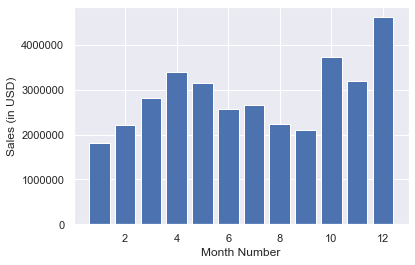

In [154]:
months = range(1,13)
plt.bar(months , results['Sales'])
plt.xlabel('Month Number')
plt.ylabel('Sales (in USD)')
plt.show()

### Q2) which city has the highest number of sales

In [141]:
all_data['City Name'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])

In [142]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [153]:
result1 = all_data.groupby('City Name').sum()
result1

,Quantity Ordered,Price Each,Month,Sales
City Name,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


San Francisco is the city with heighest number of sales

In [162]:
cities = [city for city , df in all_data.groupby('City Name')]

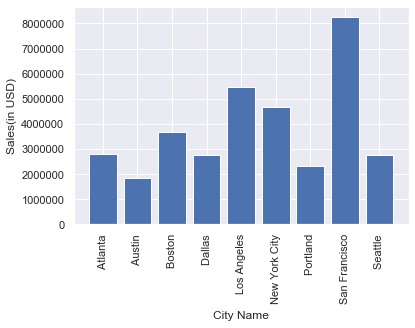

In [163]:
plt.bar(cities,result1['Sales'])
plt.xlabel('City Name')
plt.xticks(rotation = 90)
plt.ylabel('Sales(in USD)')
plt.show()

### Q3) What time should we display advertisements to maximize likelihood of customers buying product?

In [188]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08:46,08,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22:30,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09:27,09,27


In [173]:
all_data['Time'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1])

In [185]:
all_data['Hour'] = all_data['Time'].apply(lambda x : x.split(':')[0])

In [187]:
all_data['Minute'] = all_data['Time'].apply(lambda x : x.split(':')[1])

In [195]:
results3 = all_data.groupby('Hour').count()
results3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Time,Minute
Hour,,,,,,,,,,,
00,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
01,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
02,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
03,831,831,831,831,831,831,831,831,831,831,831
04,854,854,854,854,854,854,854,854,854,854,854
05,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
06,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
07,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
08,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [197]:
hours = [hour for hour , df in all_data.groupby('Hour')]

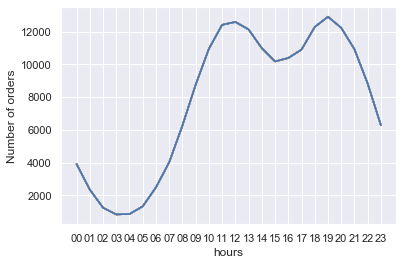

In [199]:
plt.plot(hours, results3)
plt.xlabel('hours')
plt.ylabel('Number of orders')
plt.show()

Peaks at 11 am,12pm and another peak at 7 pm , where people are ordering things.

### Q4) What products are most often sold together?

In [204]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08:46,08,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22:30,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09:27,09,27


If the product order ID is same then that means they are sold together and they are delivering to the same address.

In [206]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [207]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Time,Hour,Minute
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19:42,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19:42,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11:31,11,31


In [214]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\preethi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Time,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19:42,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19:42,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11:31,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [216]:
df  = df[['Order ID','Grouped']].drop_duplicates()

In [217]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [218]:
from itertools import combinations
from collections import Counter

In [234]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(combinations(row_list,3))

for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Q4) Which product is been sold the most? Why do you think it is sold the most?

In [237]:
result4 = all_data.groupby('Product').sum()
result4

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


In [238]:
product = [product for product , df in all_data.groupby('Product')]

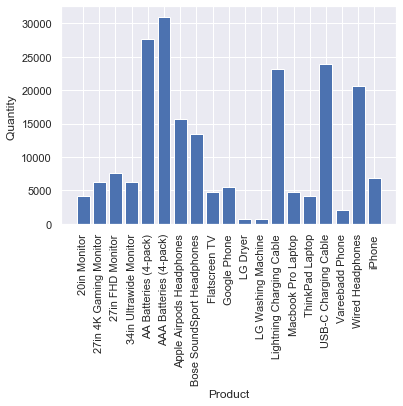

In [242]:
plt.bar(product ,result4['Quantity Ordered'] )
plt.xticks(rotation = 90)
plt.xlabel('Product')
plt.ylabel('Quantity ')
plt.show()

AAA batteries is one ofthe item which is sold the most.
Probably because they are cheap as compared to others.

In [246]:
prices = all_data.groupby('Product').mean()
prices

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382
27in FHD Monitor,1.005728,149.99,7.001199,150.849141
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520
Flatscreen TV,1.003958,300.00,7.130000,301.187500


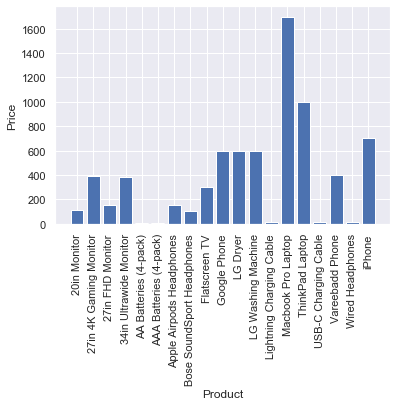

In [248]:
plt.bar(product,prices['Price Each'])
plt.xticks(rotation = 90)
plt.xlabel('Product')
plt.ylabel('Price')
plt.show()

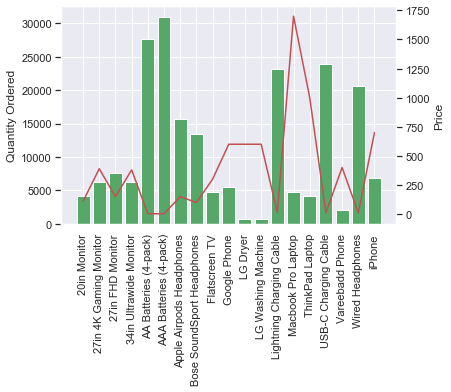

In [271]:
fig ,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,result4['Quantity Ordered'],color = 'g')
ax2.plot(product,prices['Price Each'],color = 'r')
plt.grid(axis = 'y')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(product,rotation ='vertical')
plt.show()

This plot depicts that whenever the price is low, more the products is been sold. And that make sense , as we can the LG washing machine and LG Dryer , their price is high but less number of these products are been sold.